# From the octahedron to $E_8$

Try to work out the problem in John Carlos Baez's post <https://johncarlosbaez.wordpress.com/2020/03/20/from-the-octahedron-to-e8/>.

$a+b\sqrt{2}+(c+d\sqrt{2})i+(e+f\sqrt{2})j+(g+h\sqrt{2})k$

In [1]:
from IPython.display import display, HTML
import sympy as sy

In [2]:
sy.init_printing()

In [3]:
h = sy.S(1)/2
h

Express the vectors in the orthonormal basis.

In [4]:
v1 = sy.Matrix([h, 0, h, 0, h, 0, h, 0])
v2 = sy.Matrix([0, h, 0, h, 0, 0, 0, 0])
v3 = sy.Matrix([0, 0, 1, 0, 0, 0, 0, 0])
v4 = sy.Matrix([0, 0, 0, h, 0, h, 0, 0])
v5 = sy.Matrix([0, 0, 0, 0, 1, 0, 0, 0])
v6 = sy.Matrix([0, 0, 0, 0, 0, h, 0, h])
v7 = sy.Matrix([0, 0, 0, 0, 0, 0, 1, 0])
v8 = sy.Matrix([0, 0, 0, 0, 0, 0, 0, 1])

In [5]:
vs = {1: v1, 2: v2, 3: v3, 4: v4, 5: v5, 6: v6, 7: v7, 8: v8}

Verify that they look like we mean them to.

In [6]:
def v_string(v):
    i, j, k = sy.symbols('i j k')
    s = sy.sqrt(2)
    vec = sy.Matrix([1, s, i, i*s, j, j*s, k, k*s])
    return sy.latex(sy.simplify((v.T @ vec)[0]))

def display_v(v):
    display(HTML('${}$'.format(v_string(v))))

In [7]:
display(HTML(r'\begin{align}'
             + r'\\'.join(['v_{{{}}}&={}'.format(n, v_string(vs[n])) for n in range(1, 8+1)])
             + r'\end{align}'))

Calculate the Gram matrix.

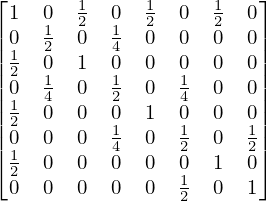

In [8]:
bad_gram_matrix = sy.Matrix([[sy.simplify((vs[m].T @ vs[n])[0])
                              for n in range(1, 8+1)]
                             for m in range(1, 8+1)])
bad_gram_matrix

I think the inner product JCB gives in his post is not the same inner product as David Harden is using in his MathOverflow question <https://mathoverflow.net/q/353486>.

\begin{align}
    \mathrm{QN}\left(a+b\sqrt{2}+(c+d\sqrt{2})i+(e+f\sqrt{2})j+(g+h\sqrt{2})k\right)
    &=
    a^2+2b^2+2ab\sqrt{2}+c^2+2d^2+2cd\sqrt{2}
    \\
    &
    +e^2+2f^2+2ef\sqrt{2}+g^2+2h^2+2gh\sqrt{2}
\end{align}

In [9]:
def QN(v):
    return sy.Matrix([sum([v[n]**2 for n in [0, 2, 4, 6]])
                      + 2*sum([v[n]**2 for n in [1, 3, 5, 7]]),
                      sum([2*v[n]*v[n+1] for n in [0, 2, 4, 6]])])

def EN(u):
    return sum(u)

In [10]:
QN(vs[1])

In [11]:
EN(QN(vs[1] + vs[1])) - EN(QN(vs[1])) - EN(QN(vs[1]))

In [12]:
def inner_prod(x, y):
    return EN(QN(x + y)) - EN(QN(x)) - EN(QN(y))

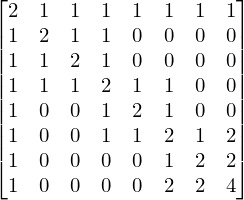

In [13]:
good_gram_matrix = sy.Matrix([[sy.simplify(inner_prod(vs[m], vs[n]))
                               for n in range(1, 8+1)]
                              for m in range(1, 8+1)])
good_gram_matrix

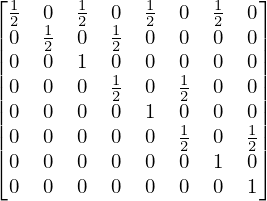

In [14]:
gen_matrix = sy.Matrix([vs[n].T for n in range(1, 8+1)])
gen_matrix

In [15]:
gen_matrix.det()

David Harden indicates that it's the Gram matrix that needs to have determinant 1:

In [16]:
good_gram_matrix.det()